# Frequent pattern and association rule mining

## Dataset 
- [Oakland Crime Statistics 2011 to 2016](https://www.kaggle.com/cityofoakland/oakland-crime-statistics-2011-to-2016)

这个数据集由2011年至2016年的奥克兰犯罪统计数据组成。

## Data analysis requirements

### 1. Data pre-process

In [1]:
import os
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from progressbar import *
from mpl_toolkits.mplot3d import Axes3D

# timekeeping
timekeeping = time.time()

# load csv file
data2011 = pd.read_csv('../Oakland-Crime-Statistics-2011-to-2016/records-for-2011.csv')
data2012 = pd.read_csv('../Oakland-Crime-Statistics-2011-to-2016/records-for-2012.csv')
data2013 = pd.read_csv('../Oakland-Crime-Statistics-2011-to-2016/records-for-2013.csv')
data2014 = pd.read_csv('../Oakland-Crime-Statistics-2011-to-2016/records-for-2014.csv')
data2015 = pd.read_csv('../Oakland-Crime-Statistics-2011-to-2016/records-for-2015.csv')
data2016 = pd.read_csv('../Oakland-Crime-Statistics-2011-to-2016/records-for-2016.csv')

# descriptors of the raw datase
print('2011:')
data2011.info()
print('2012:')
data2012.info()
print('2013:')
data2013.info()
print('2014:')
data2014.info()
print('2015:')
data2015.info()
print('2016:')
data2016.info()

2011:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180016 entries, 0 to 180015
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     180015 non-null  object 
 1   Create Time                180015 non-null  object 
 2   Location                   180016 non-null  object 
 3   Area Id                    179112 non-null  float64
 4   Beat                       179496 non-null  object 
 5   Priority                   180015 non-null  float64
 6   Incident Type Id           180015 non-null  object 
 7   Incident Type Description  180015 non-null  object 
 8   Event Number               180015 non-null  object 
 9   Closed Time                180009 non-null  object 
dtypes: float64(2), object(8)
memory usage: 13.7+ MB
2012:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187431 entries, 0 to 187430
Data columns (total 11 columns):
 #   Column                  

这6年的数据集中共包括10个共同的属性：``Agency``、 ``Create Time``、 ``Location`` (``Location 1`` and ``Location ``)、 ``Area Id``、 ``Beat``、 ``Priority``、 ``Incident Type Id``、 ``Incident Type Description``、 ``Event Number ``、 ``Closed Time ``

另外，只有2012和2014年的数据中包括了``Zip Codes``属性，且缺失值非常多，所以在频繁模式与关联规则挖掘过程中去掉该属性，然后把2012和2014年的数据中属性字段``Location 1``改为统一的字段``Location``。这里2013年的字段``Location ``多出来一个空格，也需要将该字段统一

In [2]:
# delete 'Zip Codes attribute 
data2012 = data2012.drop('Zip Codes', 1)
data2014 = data2014.drop('Zip Codes', 1)

# rename 'Location 1' with 'Location'
data2012.rename(columns={'Location 1': 'Location'}, inplace = True)
data2013.rename(columns={'Location ': 'Location'}, inplace=True)
data2014.rename(columns={'Location 1': 'Location'}, inplace=True)

In [3]:
data2011_frequency = {key: data2011[key].value_counts() for key in data2011.columns}
print(data2011_frequency)

{'Agency': OP    180015
Name: Agency, dtype: int64, 'Create Time': 2011-06-02T00:00:00.000    4
2011-03-27T00:22:41.000    3
2011-09-21T14:05:59.000    3
2011-05-03T19:30:24.000    2
2011-09-10T13:09:26.000    2
                          ..
2011-09-14T00:00:00.000    1
2011-06-26T00:29:05.000    1
2011-02-26T22:50:25.000    1
2011-04-02T05:04:20.000    1
2011-06-06T10:07:44.000    1
Name: Create Time, Length: 179451, dtype: int64, 'Location':  INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
                           ... 
14TH WILLOW ST                1
GRAND EARHART RD              1
MACARTHUR AV&D ST             1
REDWOOD PIEDMONT AV           1
EDES ALICE ST                 1
Name: Location, Length: 32505, dtype: int64, 'Area Id': 1.0    79152
2.0    67261
3.0    32699
Name: Area Id, dtype: int64, 'Beat': 04X     7410
08X     6885
26Y     5478
30Y     5295
06X     5119
23X 

根据2011年的各项属性的频数，选取共同属性中的部分属性来进行分析，选取的属性为：``Agency``、 ``Location`` 、 ``Area Id``、 ``Beat``、 ``Priority``、 ``Incident Type Id``、 ``Incident Type Description``、 ``Event Number ``

In [4]:
attribute_seleted = ['Agency', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number']

data2011_seleted = data2011[['Agency', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number']]
data2012_seleted = data2012[['Agency', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number']]
data2013_seleted = data2013[['Agency', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number']]
data2014_seleted = data2014[['Agency', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number']]
data2015_seleted = data2015[['Agency', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number']]
data2016_seleted = data2016[['Agency', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number']]

为了方便挖掘更全面的关联规则，把6年以来的所有数据合并起来

In [5]:
# data = pd.concat([data2011_seleted, 
#                   data2012_seleted, 
#                   data2013_seleted, 
#                   data2014_seleted, 
#                   data2015_seleted, 
#                   data2016_seleted], axis=0)
data = pd.concat([data2011_seleted])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180016 entries, 0 to 180015
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     180015 non-null  object 
 1   Location                   180016 non-null  object 
 2   Area Id                    179112 non-null  float64
 3   Beat                       179496 non-null  object 
 4   Priority                   180015 non-null  float64
 5   Incident Type Id           180015 non-null  object 
 6   Incident Type Description  180015 non-null  object 
 7   Event Number               180015 non-null  object 
dtypes: float64(2), object(6)
memory usage: 11.0+ MB


针对该数据集进行分析之后，针对缺失的数值，决定采用 ``将缺失部分剔除``

In [6]:
data_clean = data.dropna()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178777 entries, 0 to 180014
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     178777 non-null  object 
 1   Location                   178777 non-null  object 
 2   Area Id                    178777 non-null  float64
 3   Beat                       178777 non-null  object 
 4   Priority                   178777 non-null  float64
 5   Incident Type Id           178777 non-null  object 
 6   Incident Type Description  178777 non-null  object 
 7   Event Number               178777 non-null  object 
dtypes: float64(2), object(6)
memory usage: 12.3+ MB


至此，完成了对数据集进行处理，转换成适合进行关联规则挖掘的形式

### 2. Find frequent patterns

定义全局的支持度和置信度的阈值

In [7]:
min_sup = 0.1
min_conf = 0.5

In [8]:
# Convert DataFrame to a dictionary store
data_dict = []
for line in data_clean.values.tolist():
    data_set = []
    for i, value in enumerate(line):
        if not value:
            data_set.append((attribute_seleted[i], 'NA'))
        else:
            data_set.append((attribute_seleted[i], value))
    data_dict.append(data_set)

In [9]:
# Generate a number of cell candidate item sets
def C1_generation(dataset):
    C1 = []
    progress = ProgressBar()
    for data in progress(dataset):
        for item in data:
            if [item] not in C1:
                C1.append([item])
    return [frozenset(item) for item in C1]

# Filter item sets with support below the threshold
def Ck_low_support_filtering(dataset, Ck):
    Ck_count = dict()
    for data in dataset:
        for cand in Ck:
            if cand.issubset(data):
                if cand not in Ck_count:
                    Ck_count[cand] = 1
                else:
                    Ck_count[cand] += 1

    num_items = float(len(dataset))
    return_list = []
    sup_rata = dict()
    
    # Filter infrequent itemsets
    for key in Ck_count:
        support  = Ck_count[key] / num_items
        if support >= min_sup:
            return_list.insert(0, key)
        sup_rata[key] = support
    return return_list, sup_rata

# check whether the sub set is frequent item 
def apriori_gen(Fk, k):       
    return_list = []
    len_Fk = len(Fk)

    for i in range(len_Fk):
        for j in range(i+1, len_Fk):
            # When the k-2nd item is the same, combine the two sets
            F1 = list(Fk[i])[:k-2]
            F2 = list(Fk[j])[:k-2]
            F1.sort()
            F2.sort()
            if F1 == F2:
                return_list.append(Fk[i] | Fk[j])
    return return_list


# apriori algorithm
def apriori(dataset):
        C1 = C1_generation(dataset)  # Generate a number of cell candidate item sets
        dataset = [set(data) for data in dataset]
        F1, sup_rata = Ck_low_support_filtering(dataset, C1)
        F = [F1]
        k = 2
        while len(F[k-2]) > 0:
            # When the candidate item element is greater than 2, the subitem set is checked frequently when merging
            Ck = apriori_gen(F[k-2], k)
            
            # Filter item sets with support below the threshold
            Fk, support_k = Ck_low_support_filtering(dataset, Ck) 
            sup_rata.update(support_k)
            F.append(Fk)
            k += 1
        return F, sup_rata

In [10]:
# Get frequent sets
freq_set, sup_rata = apriori(data_dict)
sup_rata_out = sorted(sup_rata.items(), key=lambda d: d[1], reverse=True)
print("sup_rata ", sup_rata)

100% |########################################################################|
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 3. Derive the association rules and  calculate their support and confidence

In [11]:
# evaluation rule
def cal_conf(freq_set, H, sup_rata, strong_rules_list):
    prunedH = []
    for reasoned_item in H:
        sup = sup_rata[freq_set]
        conf = sup / sup_rata[freq_set - reasoned_item]
        lift = conf / sup_rata[reasoned_item]
        jaccard = sup / (sup_rata[freq_set - reasoned_item] + sup_rata[reasoned_item] - sup)
        if conf >= min_conf:
            strong_rules_list.append((freq_set - reasoned_item, reasoned_item, sup, conf, lift, jaccard))
            prunedH.append(reasoned_item)
    return prunedH

def rules_from_reasoned_item(freq_set, H, sup_rata, strong_rules_list):
    """
    H -> the list of elements that appear at the right of the rule
    """
    m = len(H[0])
    if len(freq_set) > (m+1):
        Hmp1 = apriori_gen(H, m+1)
        Hmp1 = cal_conf(freq_set, Hmp1, sup_rata, strong_rules_list)
        if len(Hmp1) > 1:
            rules_from_reasoned_item(freq_set, Hmp1, sup_rata, strong_rules_list)

基于Apriori算法，首先从一个频繁项集开始，接着创建一个规则列表，其中规则右部只包含一个元素，然后对这些规则进行测试。接下来合并所有的剩余规则列表来创建一个新的规则列表，其中规则右部包含两个元素。这种方法称作分级法。

In [12]:
# Generate strong association rules
def generate_rules(F, sup_rata):
    """
    :param F: frequent sets
    :param sup_rata: asupport for frequent sets
    :return: list of strong association rules
    """
    strong_rules_list = []
    for i in range(1, len(F)):
        for freq_set in F[i]:
            H1 = [frozenset([item]) for item in freq_set]
            # Here, only get a collection with two or more elements
            if i > 1:
                rules_from_reasoned_item(freq_set, H1, sup_rata, strong_rules_list)
            else:
                cal_conf(freq_set, H1, sup_rata, strong_rules_list)
    return strong_rules_list

In [13]:
# get strong association rules
strong_rules_list = generate_rules(freq_set, sup_rata)
strong_rules_list = sorted(strong_rules_list, key=lambda x: x[3], reverse=True)
print("strong_rules_list ", strong_rules_list)

strong_rules_list  [(frozenset({('Area Id', 3.0)}), frozenset({('Agency', 'OP')}), 0.18262975662417424, 1.0, 1.0, 0.18262975662417424), (frozenset({('Area Id', 2.0)}), frozenset({('Agency', 'OP')}), 0.3756187876516554, 1.0, 1.0, 0.3756187876516554), (frozenset({('Priority', 2.0)}), frozenset({('Agency', 'OP')}), 0.7952533043959793, 1.0, 1.0, 0.7952533043959793), (frozenset({('Area Id', 1.0)}), frozenset({('Agency', 'OP')}), 0.44175145572417035, 1.0, 1.0, 0.44175145572417035), (frozenset({('Priority', 1.0)}), frozenset({('Agency', 'OP')}), 0.2047355084826348, 1.0, 1.0, 0.2047355084826348), (frozenset({('Area Id', 1.0)}), frozenset({('Priority', 2.0)}), 0.35613082219748626, 0.8061791706236151, 1.0137388504609035, 0.40429260858521715), (frozenset({('Area Id', 1.0)}), frozenset({('Priority', 2.0), ('Agency', 'OP')}), 0.35613082219748626, 0.8061791706236151, 1.0137388504609035, 0.40429260858521715), (frozenset({('Agency', 'OP')}), frozenset({('Priority', 2.0)}), 0.7952533043959793, 0.795253

In [15]:
# Save the frequent patterns
out_path = './results'
freq_set_file = open(os.path.join(out_path, 'frequent_pattern.json'), 'w')
for (key, value) in sup_rata_out:
    result_dict = {'set': None, 'sup': None}
    set_result = list(key)
    sup_result = value
    if sup_result < min_sup:
        continue
    result_dict['set'] = set_result
    result_dict['sup'] = sup_result
    json_str = json.dumps(result_dict, ensure_ascii=False)
    freq_set_file.write(json_str + '\n')
freq_set_file.close()

# Save the strong association rules
rules_file = open(os.path.join(out_path, 'association_rule.json'), 'w')
for result in strong_rules_list:
    result_dict = {'X_set': None, 'Y_set': None, 'sup': None, 'conf': None, 'lift': None, 'jaccard': None}
    X_set, Y_set, sup, conf, lift, jaccard = result
    result_dict['X_set'] = list(X_set)
    result_dict['Y_set'] = list(Y_set)
    result_dict['sup'] = sup
    result_dict['conf'] = conf
    result_dict['lift'] = lift
    result_dict['jaccard'] = jaccard

    json_str = json.dumps(result_dict, ensure_ascii=False)
    rules_file.write(json_str + '\n')
rules_file.close()

### 4. Evaluation rule

除了支持度(Sup)和置信度(Conf)两项度量规则之外， 还是实现了Lift和Jaccard，计算公式如下：

$Sup(X) = \frac{count(X)}{count(data)}$

$Conf(X \rightarrow Y) = \frac{Sup(X \cup Y)}{Sup(X)}$

$Lift(X \rightarrow Y) = \frac{Sup(X \cup Y)}{Sup(X) \times Sup(Y)}$

$Jaccard(X \rightarrow Y) = \frac{Sup(X \cup Y)}{Sup(X) + Sup(Y) - Sup(X \cup Y)}$

In [16]:
# evaluation rule
def cal_conf(freq_set, H, sup_rata, strong_rules_list):
    prunedH = []
    for reasoned_item in H:
        sup = sup_rata[freq_set]
        conf = sup / sup_rata[freq_set - reasoned_item]
        lift = conf / sup_rata[reasoned_item]
        jaccard = sup / (sup_rata[freq_set - reasoned_item] + sup_rata[reasoned_item] - sup)
        if conf >= min_conf:
            strong_rules_list.append((freq_set - reasoned_item, reasoned_item, sup, conf, lift, jaccard))
            prunedH.append(reasoned_item)
    return prunedH

### 5. Visualizatoin

In [17]:
def visualization():
    with open('./results/frequent_pattern.json') as f:
        freq = [json.loads(each) for each in f.readlines()]

    with open('./results/association_rule.json') as f:
        rules = [json.loads(each) for each in f.readlines()]

    freq_sup = [each['sup'] for each in freq]
    plt.boxplot(freq_sup,
               sym='o',
               vert=True,
               widths=0.6,
               meanline=True)
    plt.ylabel('Frequent Pattern')
    plt.show()

    rules_sup = [each['sup'] for each in rules]
    rules_conf = [each['conf'] for each in rules]


    plt.scatter(rules_sup, rules_conf, s=20, c='b', marker='.')
    plt.xlabel = 'Support'
    plt.ylabel = 'Confidence'
    plt.legend(loc='best')
    plt.show()

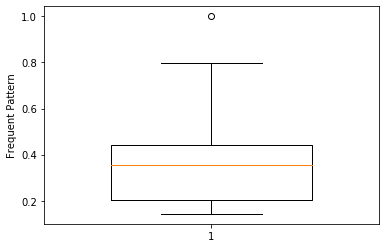

No handles with labels found to put in legend.


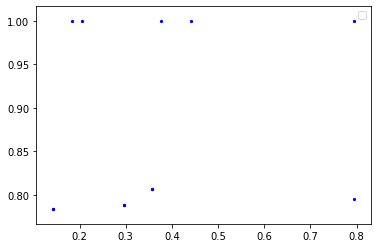

In [18]:
visualization()

In [19]:
m, s = divmod(time.time()-timekeeping, 60)
h, m = divmod(m, 60)
print ('run time: %02d:%02d:%02d' % (h, m, s))

run time: 01:16:30


### 6. Analysis

 由于时间关系，本次实验未采用所有数据，仅使用2011年的数据共用时``1:16:30``，挖掘中得到的频繁模式与关联规则会分别保存在``./results/frequent_pattern.json``和``./results/association_rule.json``中

In [20]:
with open('./results/frequent_pattern.json') as f:
    freq = [json.loads(each) for each in f.readlines()]

with open('./results/association_rule.json') as f:
    rules = [json.loads(each) for each in f.readlines()]

print('frequent_pattern.json')
print(freq)

print('association_rule.json')
print(rules)

frequent_pattern.json
[{'set': [['Agency', 'OP']], 'sup': 1.0}, {'set': [['Priority', 2.0]], 'sup': 0.7952533043959793}, {'set': [['Priority', 2.0], ['Agency', 'OP']], 'sup': 0.7952533043959793}, {'set': [['Area Id', 1.0]], 'sup': 0.44175145572417035}, {'set': [['Agency', 'OP'], ['Area Id', 1.0]], 'sup': 0.44175145572417035}, {'set': [['Area Id', 2.0]], 'sup': 0.3756187876516554}, {'set': [['Agency', 'OP'], ['Area Id', 2.0]], 'sup': 0.3756187876516554}, {'set': [['Priority', 2.0], ['Area Id', 1.0]], 'sup': 0.35613082219748626}, {'set': [['Priority', 2.0], ['Agency', 'OP'], ['Area Id', 1.0]], 'sup': 0.35613082219748626}, {'set': [['Priority', 2.0], ['Area Id', 2.0]], 'sup': 0.2960951352802654}, {'set': [['Priority', 2.0], ['Agency', 'OP'], ['Area Id', 2.0]], 'sup': 0.2960951352802654}, {'set': [['Priority', 1.0]], 'sup': 0.2047355084826348}, {'set': [['Priority', 1.0], ['Agency', 'OP']], 'sup': 0.2047355084826348}, {'set': [['Area Id', 3.0]], 'sup': 0.18262975662417424}, {'set': [['Area

根据频繁模式可知：
- 频繁一项集：
    - ``Agency=OP``的支持度是1，体现不出什么有价值的信息，故忽略;
    - ``Priority=2.0``的支持度为0.795,也就是说该地区的犯罪等级大多是``2``;
    - ``Area Id=1.0``时支持度为0.442，说明在该地区的犯罪事实出现最多，``Area Id=2.0``的支持度为0.375，比``Area Id=1.0``稍微低一些，这说明了该地区的犯罪记录为第二多。
- 频繁二项集（除去包含``Agency=OP``的项）：
    - ``Priority=2.0 & Area Id=1.0``的支持度最高，为0.356，说明该地区的犯罪等级大多数为``2``

根据关联规则可知（除去``Agency==OP``）：
- ``Area Id=2.0`` $\rightarrow$ ``Priority=2.0``的支持度(sup)=0.296，置信度(conf)=0.788，lift=0.991, jaccard=0.338，这说明犯罪的严重性与所在地有着较强联系。